In [9]:
# Imports
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.signal as signal

from remove_dc_from_spad import remove_dc_from_spad_edge
from capture_utils import load_spad
from matplotlib.ticker import FormatStrFormatter

from capture_utils import savefig_no_whitespace

scene = "8_30_small_lab_scene"
# scene = "8_29_kitchen_scene"
# scene = "8_30_conference_room2_scene"
model = "midas"
scenedir = os.path.join("figures", model, scene)
rootdir = os.path.join("data", scene)

In [24]:
# Load SPAD and intermediates
spad_hists = {}
for file in ["spad_single_relevant", "spad_denoised", "spad_corrected", "spad_sid"]:
    spad_hists[file] = np.load(os.path.join(scenedir, file + ".npy"))
intermediates = np.load(os.path.join(scenedir, "intermediates.npy"), allow_pickle=True).item()
spad_metadata = np.load(os.path.join(scenedir, "spad_metadata.npy"), allow_pickle=True).item()
spad_metadata["init_bin_edges"] = spad_metadata["init_bin_edges:"]
# Extract stuff
bin_edges = spad_metadata["init_bin_edges"]
bin_values = spad_metadata["init_bin_values"]
init_sid_bin_edges = spad_metadata["init_sid_bin_edges"]
init_sid_bin_values = spad_metadata["init_sid_bin_values"][:-2]
pred_sid_bin_edges = spad_metadata["pred_sid_bin_edges"]
pred_sid_bin_values = spad_metadata["pred_sid_bin_values"][:-2]
ambient_estimate = spad_metadata["ambient_estimate"]

In [23]:
len(init_sid_bin_values)

602

In [38]:
print(len(bin_values))
print(len(spad_hists["spad_single_relevant"]))


3584
3584


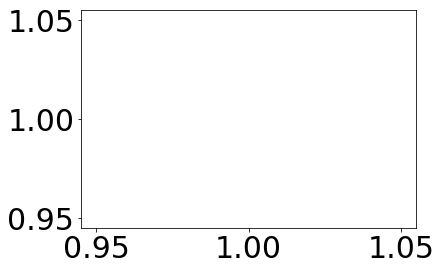

In [82]:
fig = plt.figure()
plt.plot(1, 1)
ax =fig.axes
ax

In [95]:
def plt_hist(depth_m, counts, ymin, ymax, outfile, figsize=(15, 10), fontsize=20, labelsize=30):
    fig = plt.figure()
    plt.plot(depth_m, counts)
    ax = fig.axes[0]
    plt.yscale('log')
    plt.fill_between(depth_m, counts)
#     plt.xlabel("Depth (m)", fontsize=fontsize, fontname="serif")
#     plt.ylabel("Counts", fontsize=fontsize, fontname="serif")
#     plt.rc('xtick', labelsize=labelsize)
#     plt.rc('ytick', labelsize=labelsize)
    ax.tick_params(labelsize=labelsize, length=10)
    plt.ylim([ymin, ymax])
    plt.savefig(os.path.join(scenedir, outfile), bbox_inches="tight")


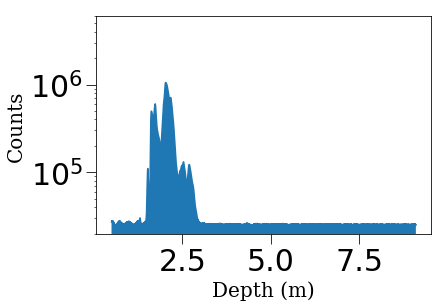

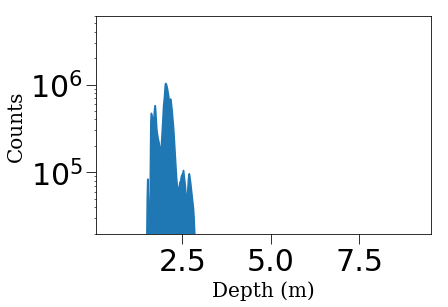

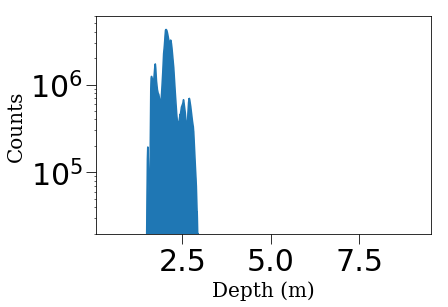

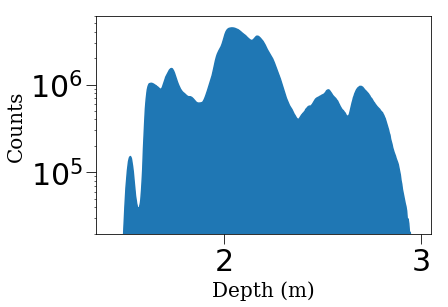

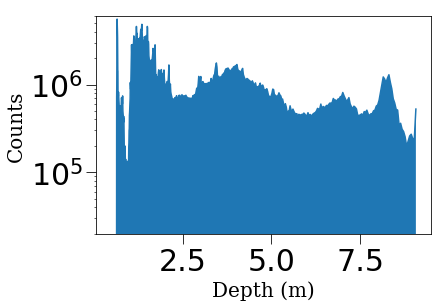

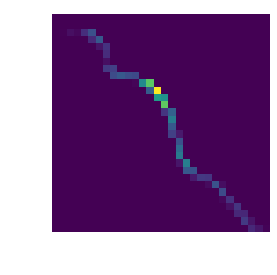

In [96]:
# Plot and save stuff
ymin = 2e4
ymax = 6e6

# Raw SPAD
plt_hist(bin_values, spad_hists["spad_single_relevant"], ymin, ymax, "spad_single_relevant.pdf")

# Remove ambient
plt_hist(bin_values, spad_hists["spad_denoised"], ymin, ymax, "spad_denoised.pdf")

# Correct falloff
plt_hist(bin_values, spad_hists["spad_corrected"], ymin, ymax, "spad_corrected.pdf")

# Re-bin
plt_hist(pred_sid_bin_values, spad_hists["spad_sid"], ymin, ymax, "spad_sid.pdf")

# Init Hist
plt_hist(init_sid_bin_values, intermediates["init_hist"], ymin, ymax, "init_hist.pdf")
plt_hist

# Intensity-weighted histogram
# Downsample T_count
import cv2
T_count_resized = cv2.resize(intermediates["T_count"], (30, 30), interpolation=cv2.INTER_AREA)
plt.figure()
plt.imshow(T_count_resized)
plt.axis('off')
plt.savefig(os.path.join(scenedir, "T_count_resized.pdf"), bbox_inches="tight")



In [17]:
spad_single_relevant

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)